In [1]:
# CARGAR LIBRERIAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
#from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# CARGAR BASE DE DATOS

df = pd.read_csv('../BBDD/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# BORRAR COLUMNA ID

df.drop(columns='id', inplace=True)

In [5]:
# COMPROBAR NANS Y SUS PORCENTAJES

print(df.isnull().sum())
print('')
print(df.isnull().sum() / len(df) * 100)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [6]:
# COMPROBAR DUPLICADOS

df.duplicated().sum()

0

In [17]:
# ESTADISTICOS DEL DATAFRAME

round(df.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [11]:
# LISTA DE COLUMNAS

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

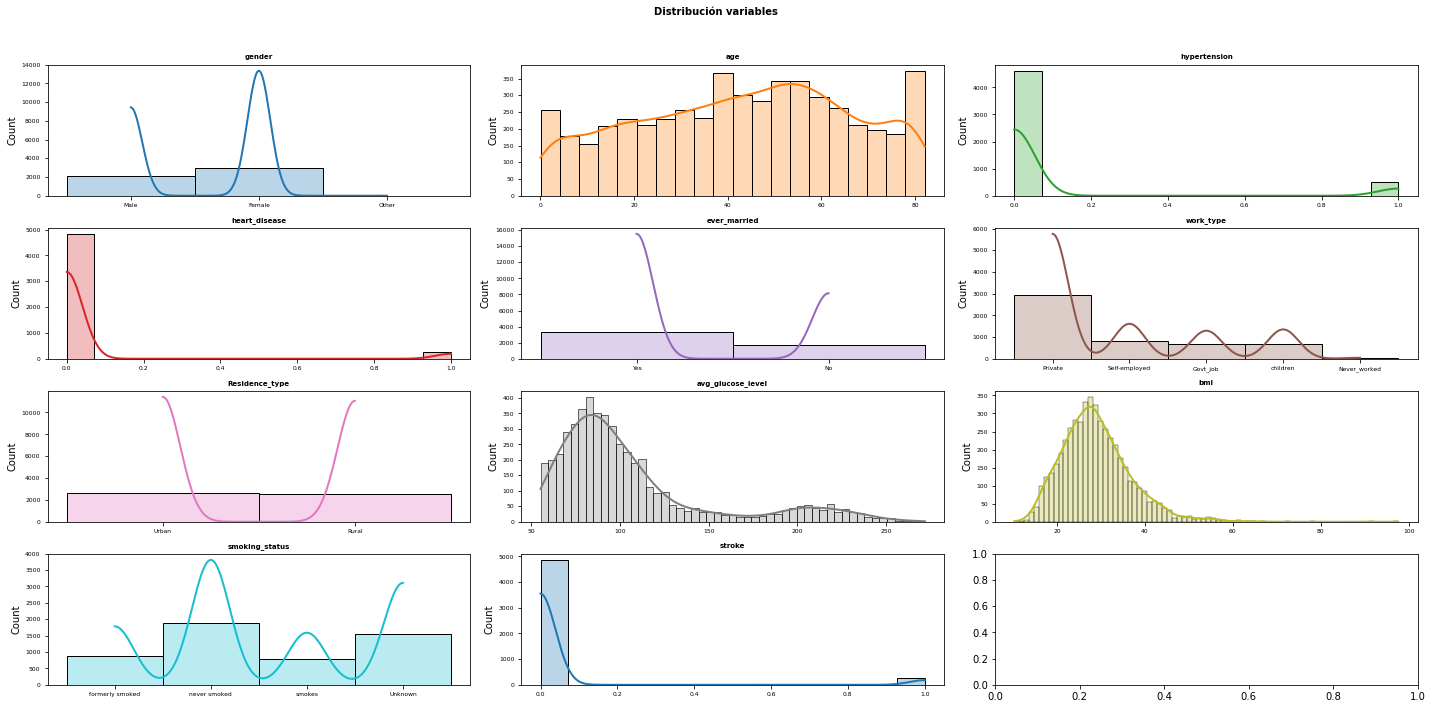

In [14]:
# DISTRIBUCION DE LAS VARIABLES

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))
axes = axes.flat
columnas = df.columns

for i, col in enumerate(columnas):
    sns.histplot(
        data=df,
        x=col,
        stat="count",
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha= 0.3,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables', fontsize=10, fontweight="bold");

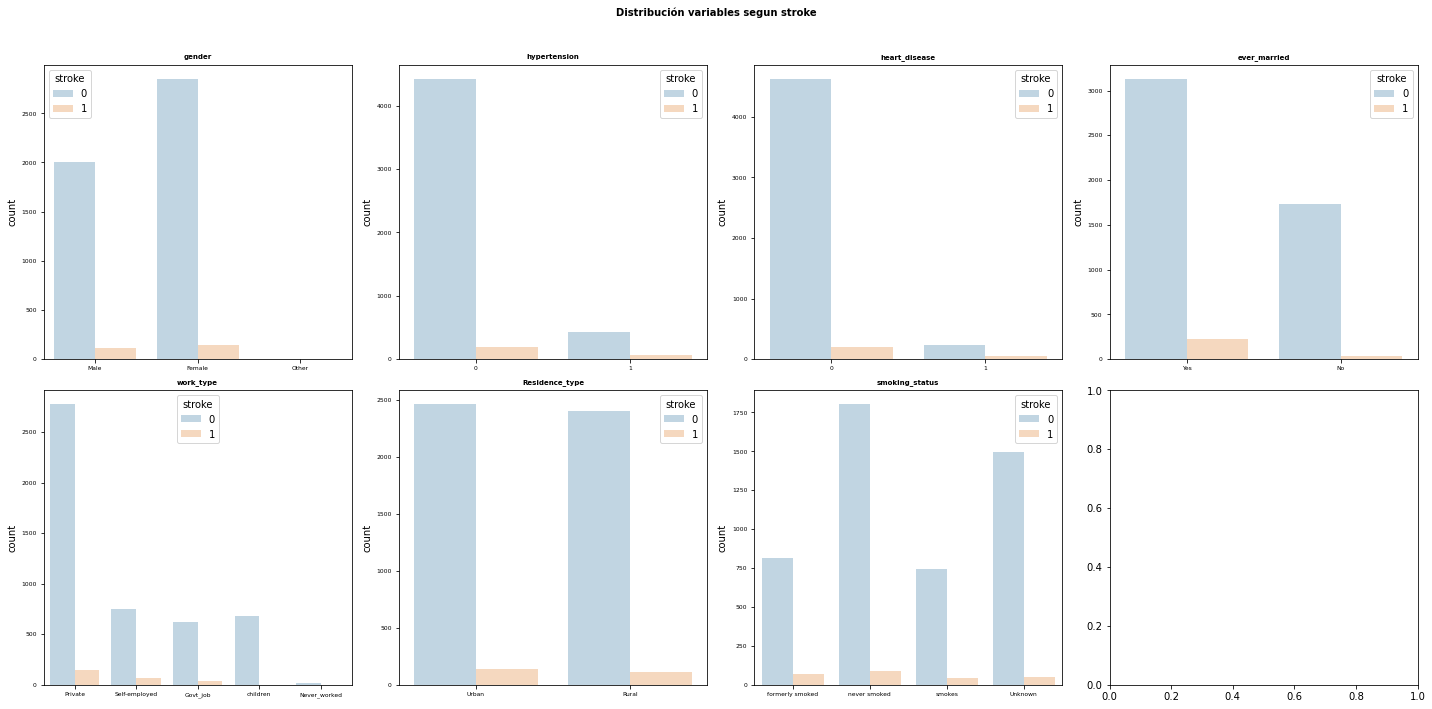

In [36]:
# DISTRIBUCION DE STROKE CON RESTO DE VARIABLES

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']]

for i, col in enumerate(columnas):
    sns.countplot(
        data=df,
        x=col,
        hue='stroke',
        alpha= 0.3,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables segun stroke', fontsize=10, fontweight="bold");

C:\Users\artur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\artur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='stroke'>

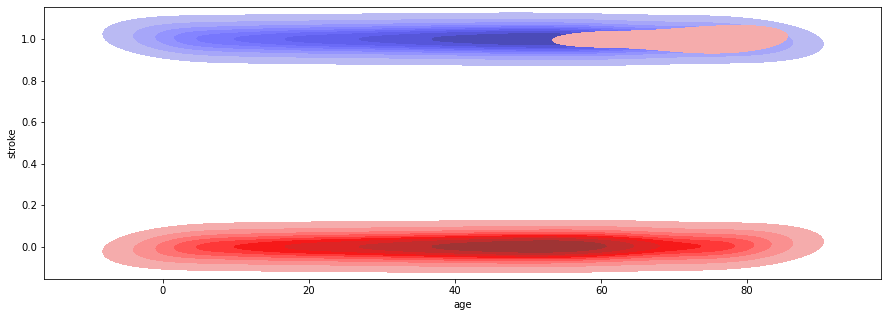

In [40]:
# DISTRIBUCION DE VARIABLES NUMERICAS

plt.figure(figsize=(15,5))
sns.kdeplot(df['age'], df['stroke'] == 0, shade=True, color='blue')
sns.kdeplot(df['age'], df['stroke'] == 1, shade=True, color='red')

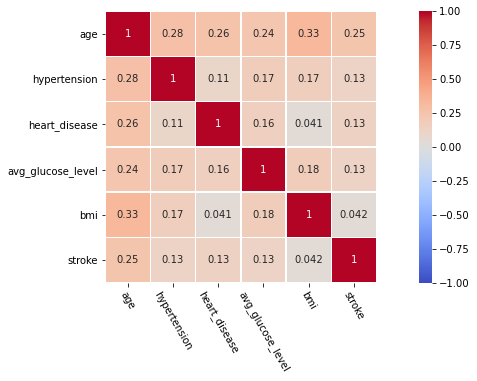

In [19]:
# CORRELACION DE LAS VARIABLES

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square = True,
           linewidths = 0.5,
           annot=True)

plt.xticks(rotation=-60);